2025-07-17 19:49:57.611732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752781797.816702      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752781797.876340      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Gesture Label Map: {'01_palm': 0, '02_l': 1, '03_fist': 2, '04_fist_moved': 3, '05_thumb': 4, '06_index': 5, '07_ok': 6, '08_palm_moved': 7, '09_c': 8, '10_down': 9}
📥 Loading data...
✅ Loaded 2000 images.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1752781827.014856      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752781827.015540      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


🚀 Training model...
Epoch 1/10


I0000 00:00:1752781830.245284      61 service.cc:148] XLA service 0x79c770009500 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752781830.245993      61 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752781830.246032      61 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752781830.524269      61 cuda_dnn.cc:529] Loaded cuDNN version 90300


34/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4878 - loss: 1.5598

I0000 00:00:1752781833.334259      61 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.5886 - loss: 1.2753 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9904 - loss: 0.0291 - val_accuracy: 1.0000 - val_loss: 1.7375e-04
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9964 - loss: 0.0127 - val_accuracy: 1.0000 - val_loss: 1.0823e-05
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9979 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 6.2106e-05
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9987 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 1.7492e-04
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9983 - loss: 0.0096 - val_accuracy: 1.0000 - val_loss: 7.1382e-06
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9988 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 1.6683e-04
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9986 - loss: 0.0075 - val_accuracy: 1.00

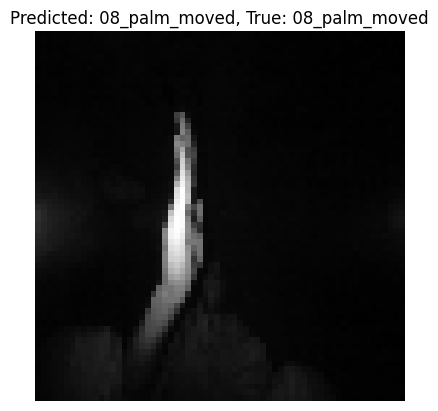

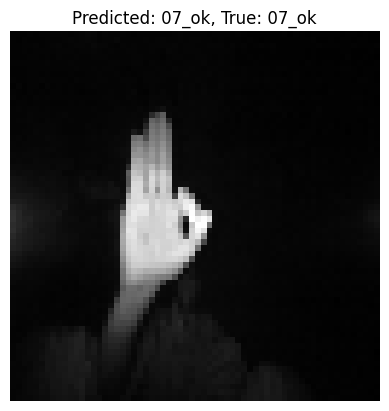

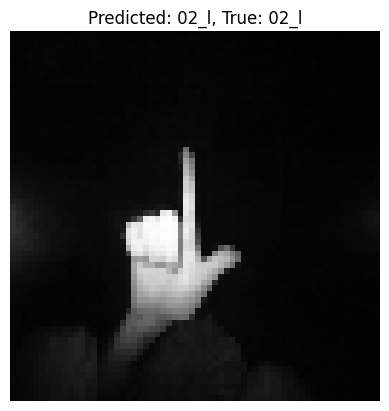

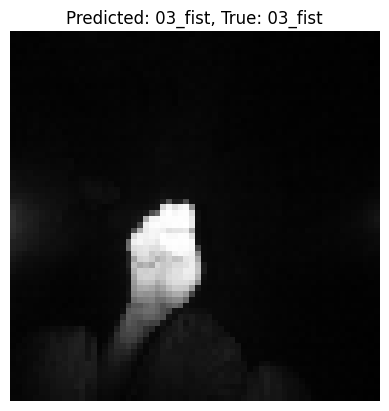

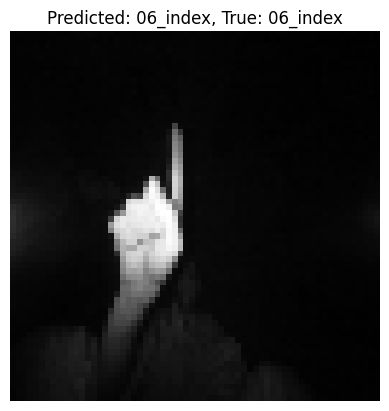

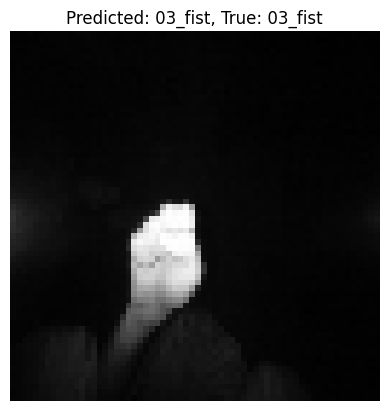

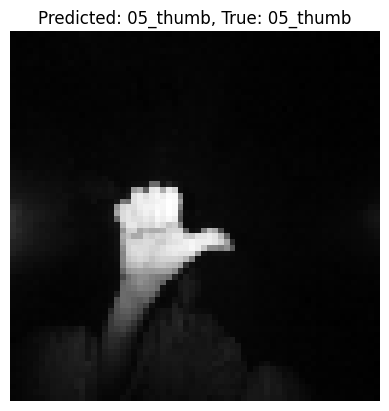

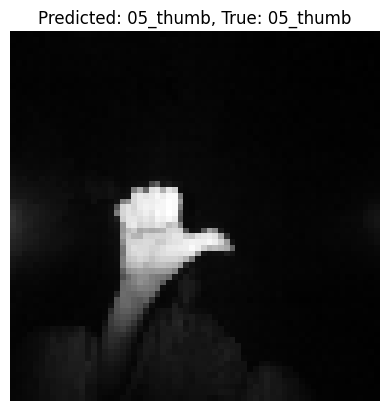

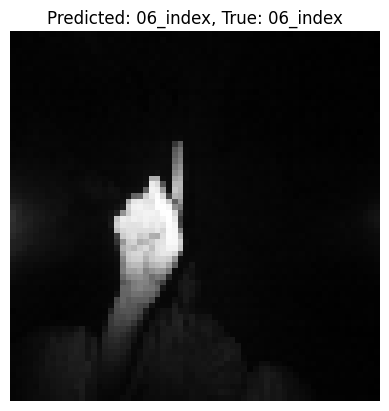

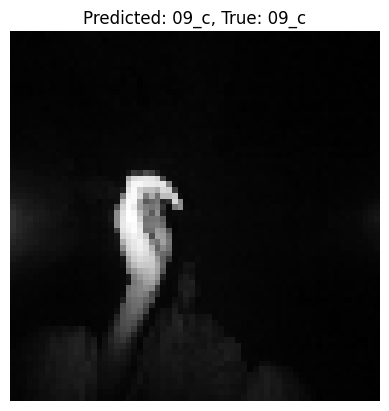

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Constants
DATASET_DIR = "/kaggle/input/hand-gesture-movement/leapGestRecog"
IMG_SIZE = 64

# Step 1: Build gesture label map from folders under '00'
def build_gesture_label_map(dataset_path):
    user_folder = os.path.join(dataset_path, "01")
    gesture_folders = sorted([
        f for f in os.listdir(user_folder)
        if os.path.isdir(os.path.join(user_folder, f))
    ])
    return {gesture: idx for idx, gesture in enumerate(gesture_folders)}

# Step 2: Load images and assign labels
def load_images(dataset_path, gesture_label_map):
    X = []
    y = []
    user_path = os.path.join(dataset_path, "01")
    for gesture in os.listdir(user_path):
        gesture_path = os.path.join(user_path, gesture)
        if os.path.isdir(gesture_path) and gesture in gesture_label_map:
            label = gesture_label_map[gesture]
            for img_file in os.listdir(gesture_path):
                if img_file.endswith(".png"):
                    img_path = os.path.join(gesture_path, img_file)
                    try:
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                        X.append(img)
                        y.append(label)
                    except Exception as e:
                        print(f"⚠️ Skipped {img_path}: {e}")
    return np.array(X), np.array(y)

# Step 3: Build label map and load data
gesture_label_map = build_gesture_label_map(DATASET_DIR)
label_map_reverse = {v: k for k, v in gesture_label_map.items()}
print("Gesture Label Map:", gesture_label_map)

print("📥 Loading data...")
X, y = load_images(DATASET_DIR, gesture_label_map)
print(f"✅ Loaded {len(X)} images.")

if len(X) == 0:
    raise ValueError("No images loaded. Check dataset path and folder structure.")

# Step 4: Normalize and reshape data
X = X / 255.0
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Step 5: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 6: Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(gesture_label_map), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train model
print("🚀 Training model...")
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Step 8: Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc * 100:.2f}%")

# Step 9: Visualize predictions
print("\n🔍 Displaying test predictions:")
predictions = model.predict(X_test[:10])
for i, pred in enumerate(predictions):
    plt.imshow(X_test[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    predicted_label = label_map_reverse[np.argmax(pred)]
    true_label = label_map_reverse[y_test[i]]
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.axis('off')
    plt.show()

# Step 9: Predict user image
def predict_user_image(image_path):
    if not os.path.exists(image_path):
        print("❌ Image path does not exist.")
        return

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = img.reshape(1, IMG_SIZE, IMG_SIZE, 1)

    prediction = model.predict(img)
    predicted_label = label_map_reverse[np.argmax(prediction)]

    plt.imshow(img.reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f"Predicted Gesture: {predicted_label}")
    plt.axis('off')
    plt.show()

    print(f"🧠 Predicted Gesture ID: {predicted_label}")